<a href="https://colab.research.google.com/github/billiahkerubo1/Week4_IndependentProject_January_CoreProgram/blob/main/Week4_IndependentProject_January_BilliahKeruboMenyenya_CoreProgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the Question

a.) Specifying the question:
The problem statement in this study is to determine why there is a difference between the bluecars taken and the bluecars returned. 

b.) Defining the metric for success: The more the number of the cars are returned, the more the data points awarded. This will encourage the cars to be returned and the solution is found for the challenges that prevent the return of the cars.

c.) Understanding the context: Autolib is an electric car-sharing service company. There is a challenge on ow to improve efficiency and can be achieved by improving the number of cars returned and the time taken.

d.) Recording the Experimental Design

Business Understanding: Understanding the context of the analysis and trying to find a solution. Reading the data: Reading the data using the pandas library.I imported the necessary libraries including seaborn and matplotlib as well as the statistical libraries. Checking the data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others. Data cleaning: Dealt with outliers, null values and duplicated values. Challenged the solution.

e.) Challenging the solution: The solution was challenged through hypothesis testing. The null and alternative hypotheses were stated nd the appropriate statitical tests conducted, with the correct level of significance.

# 2.Importing libraries

In [42]:
#importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import stats
from scipy.stats import norm

# 3. Loading the data

In [6]:
#loading the dataset
autolib_df = pd.read_csv('/content/autolib_daily_events_postal_code.csv',parse_dates=['date'])

# 4. Checking the data

In [7]:
#previewing the first records of the dataset
autolib_df.head(15)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,2018-01-07,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,2018-01-08,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,2018-01-09,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,2018-01-10,1440,2,weekday,88,85,5,5,11,11,23,22


In [8]:
#previewing the last records of the dataset
autolib_df.tail(15)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16070,95880,2018-06-05,1439,1,weekday,4,6,0,0,2,1,0,0
16071,95880,2018-06-06,1440,2,weekday,12,12,0,1,0,0,0,0
16072,95880,2018-06-07,1439,3,weekday,10,11,1,0,0,0,0,0
16073,95880,2018-06-08,1438,4,weekday,11,9,0,0,0,0,0,0
16074,95880,2018-06-09,1440,5,weekend,15,15,0,0,1,2,0,0
16075,95880,2018-06-10,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,2018-06-11,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,2018-06-12,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,2018-06-13,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,1439,3,weekday,15,13,0,0,0,0,0,0


In [9]:
#checking the size of the dataset
autolib_df.shape

(16085, 13)

The autolib dataset has 16085 rows and 13 columns

In [10]:
#checking the columns
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [11]:
#checking the datatypes
autolib_df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [12]:
#checking for unique values
autolib_df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [13]:
#checking for unique value per column
autolib_df['Postal code'].unique()


array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [14]:
autolib_df['date'].unique()

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

In [15]:
autolib_df['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [16]:
autolib_df['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

# 5. Data Cleaning

In [17]:
#checking for null values
autolib_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

The dataset has no null values.

In [18]:
#checking for duplicates
autolib_df.duplicated().sum()

0

The dataset has no duplicates

In [19]:
#uniformity by eliminating the empty spaces and changing the column titles to lowercase
autolib_df.columns = autolib_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib_df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [20]:
autolib_df.set_index('date')

,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,3,2,10,9,22,20
2018-01-02,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2018-01-03,75001,1439,2,weekday,138,139,0,0,2,2,27,27
2018-01-04,75001,1320,3,weekday,104,104,2,2,9,8,25,21
2018-01-05,75001,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-15,95880,1440,4,weekday,15,10,0,0,2,3,0,0
2018-06-16,95880,1440,5,weekend,19,19,0,0,2,1,0,0
2018-06-17,95880,1440,6,weekend,33,35,1,1,0,0,0,0


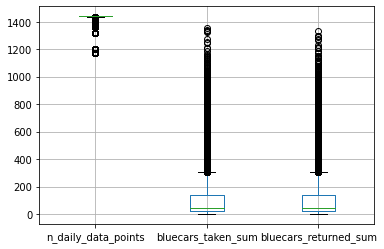

In [21]:
#checking for outliers
columns = ['n_daily_data_points',	'bluecars_taken_sum',	'bluecars_returned_sum']
autolib_df.boxplot(columns)

The outliers identified are relevant to the analysis to be conducted. Therefore, no need to remove them.

In [22]:
#the records on bluecars
bc_df = autolib_df[['date','postal_code','n_daily_data_points','dayofweek','day_type','bluecars_taken_sum','bluecars_returned_sum']]
bc_df

,date,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,2018-01-01,75001,1440,0,weekday,110,103
1,2018-01-02,75001,1438,1,weekday,98,94
2,2018-01-03,75001,1439,2,weekday,138,139
3,2018-01-04,75001,1320,3,weekday,104,104
4,2018-01-05,75001,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,2018-06-15,95880,1440,4,weekday,15,10
16081,2018-06-16,95880,1440,5,weekend,19,19
16082,2018-06-17,95880,1440,6,weekend,33,35
16083,2018-06-18,95880,1440,0,weekday,11,14


In [23]:
bc_df.set_index('date')

,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
date,,,,,,
2018-01-01,75001,1440,0,weekday,110,103
2018-01-02,75001,1438,1,weekday,98,94
2018-01-03,75001,1439,2,weekday,138,139
2018-01-04,75001,1320,3,weekday,104,104
2018-01-05,75001,1440,4,weekday,114,117
...,...,...,...,...,...,...
2018-06-15,95880,1440,4,weekday,15,10
2018-06-16,95880,1440,5,weekend,19,19
2018-06-17,95880,1440,6,weekend,33,35


In [24]:
bc_df.columns

Index(['date', 'postal_code', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum'],
      dtype='object')

# 6. Data Sampling

The sampling method to be used is clustering. It is because the records are similar yet internally diverse from the entirestatistical population.

No handles with labels found to put in legend.


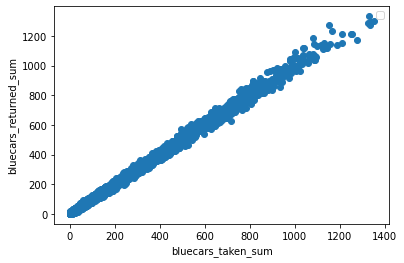

In [25]:
#plotting the data
plt.scatter(bc_df['bluecars_taken_sum'],bc_df['bluecars_returned_sum'])
plt.xlabel('bluecars_taken_sum')
plt.ylabel('bluecars_returned_sum')
plt.legend()

In [26]:
km = KMeans(n_clusters= 5)
km

KMeans(n_clusters=5)

In [27]:
y_predicted = km.fit_predict(bc_df[['bluecars_returned_sum','bluecars_taken_sum']])
y_predicted

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [28]:
#adding the cluster column
bc_df['cluster'] = y_predicted
bc_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,cluster
0,2018-01-01,75001,1440,0,weekday,110,103,0
1,2018-01-02,75001,1438,1,weekday,98,94,0
2,2018-01-03,75001,1439,2,weekday,138,139,0
3,2018-01-04,75001,1320,3,weekday,104,104,0
4,2018-01-05,75001,1440,4,weekday,114,117,0


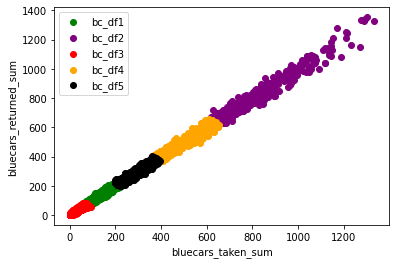

In [29]:
#separating the dataset into the clusters
bc_df1 = bc_df[bc_df.cluster==0]
bc_df2 = bc_df[bc_df.cluster==1]
bc_df3 = bc_df[bc_df.cluster==2]
bc_df4 = bc_df[bc_df.cluster==3]
bc_df5 = bc_df[bc_df.cluster==4]
plt.scatter(bc_df1['bluecars_returned_sum'],bc_df1['bluecars_taken_sum'], color = 'green',label = 'bc_df1')
plt.scatter(bc_df2['bluecars_returned_sum'],bc_df2['bluecars_taken_sum'], color = 'purple',label = 'bc_df2')
plt.scatter(bc_df3['bluecars_returned_sum'],bc_df3['bluecars_taken_sum'], color = 'red', label = 'bc_df3')
plt.scatter(bc_df4['bluecars_returned_sum'],bc_df4['bluecars_taken_sum'], color = 'orange', label = 'bc_df4')
plt.scatter(bc_df5['bluecars_returned_sum'],bc_df5['bluecars_taken_sum'], color = 'black', label = 'bc_df5')
plt.xlabel('bluecars_taken_sum')
plt.ylabel('bluecars_returned_sum')
plt.legend()

In [30]:
#the centers of the clusters
km.cluster_centers_

array([[122.20198223, 122.39268626],
       [800.98576512, 800.59608541],
       [ 28.90130996,  28.84566138],
       [475.02721686, 474.67778753],
       [293.56168582, 294.21532567]])

For my analysis I will choose the bc_df3 cluster to work with because it has a relatively higher number of samples compared to the other clusters. Therefore there will be minimal error.

In [54]:
#previewing our bc_df3 dataset
bc_df3.head()

,date,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,cluster
54,2018-02-24,75001,1396,5,weekend,8,9,2
155,2018-06-19,75001,1370,1,weekday,6,7,2
210,2018-02-24,75002,1396,5,weekend,12,12,2
311,2018-06-19,75002,1370,1,weekday,5,6,2
366,2018-02-24,75003,1396,5,weekend,25,12,2


In [53]:
#checking the size of our sample
bc_df3.shape 

(10169, 8)

The bc_df2 cluster has 10169 rows and 8 columns

# 7. Exploratory Data Analysis

a.) Univariate Analysis

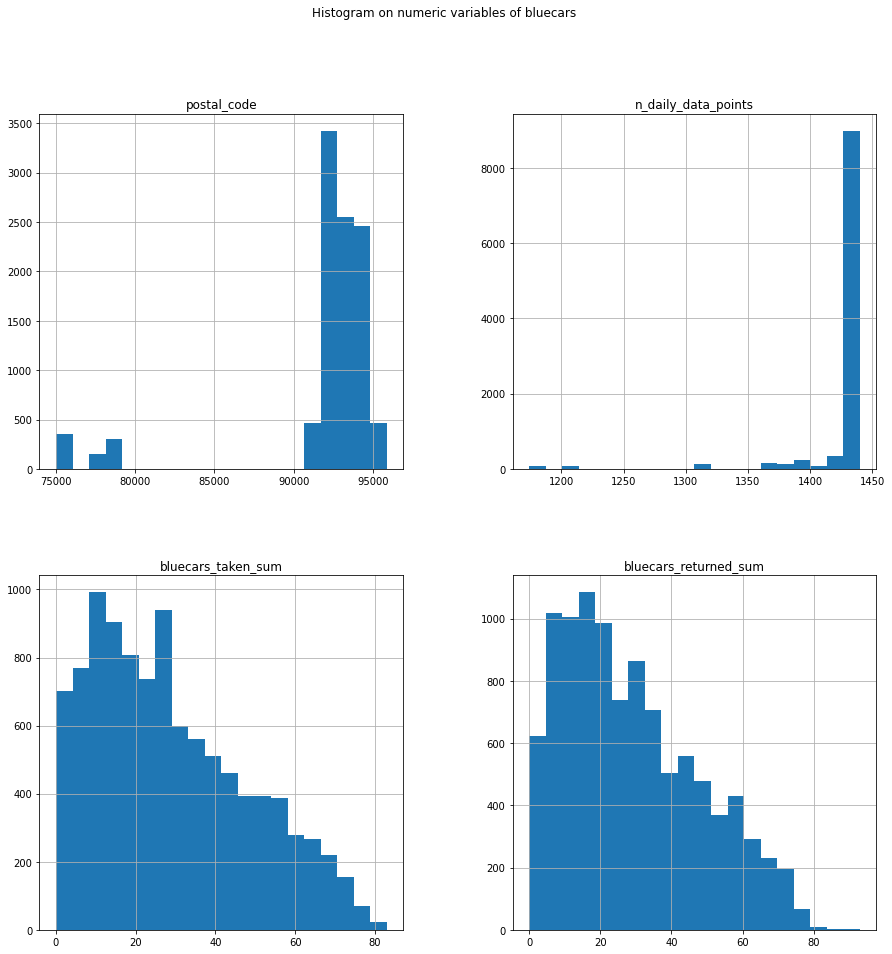

In [55]:
# Plotting our numerical variables on histogram to see the distribution
bc_df3.drop(['day_type','cluster','dayofweek'],axis=1).hist(bins=20, figsize=(15,15))
plt.suptitle("Histogram on numeric variables of bluecars")
plt.savefig('Bluecars Histogram')
plt.show()


The bluecars taken and bluecars return are negatively skewed.

b.) Bivariate Analysis

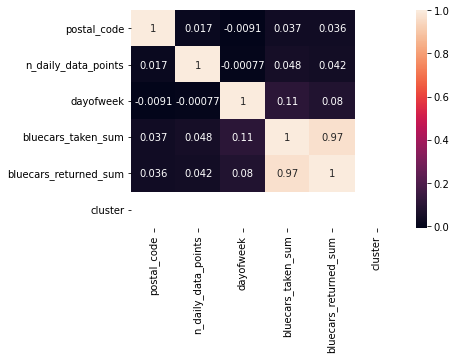

In [56]:
#correlation between variables on a heatmap
correlation = bc_df3.corr()
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)


There is a high positive correlation of 0.97 between the bluecars taken and the bluecars returned.

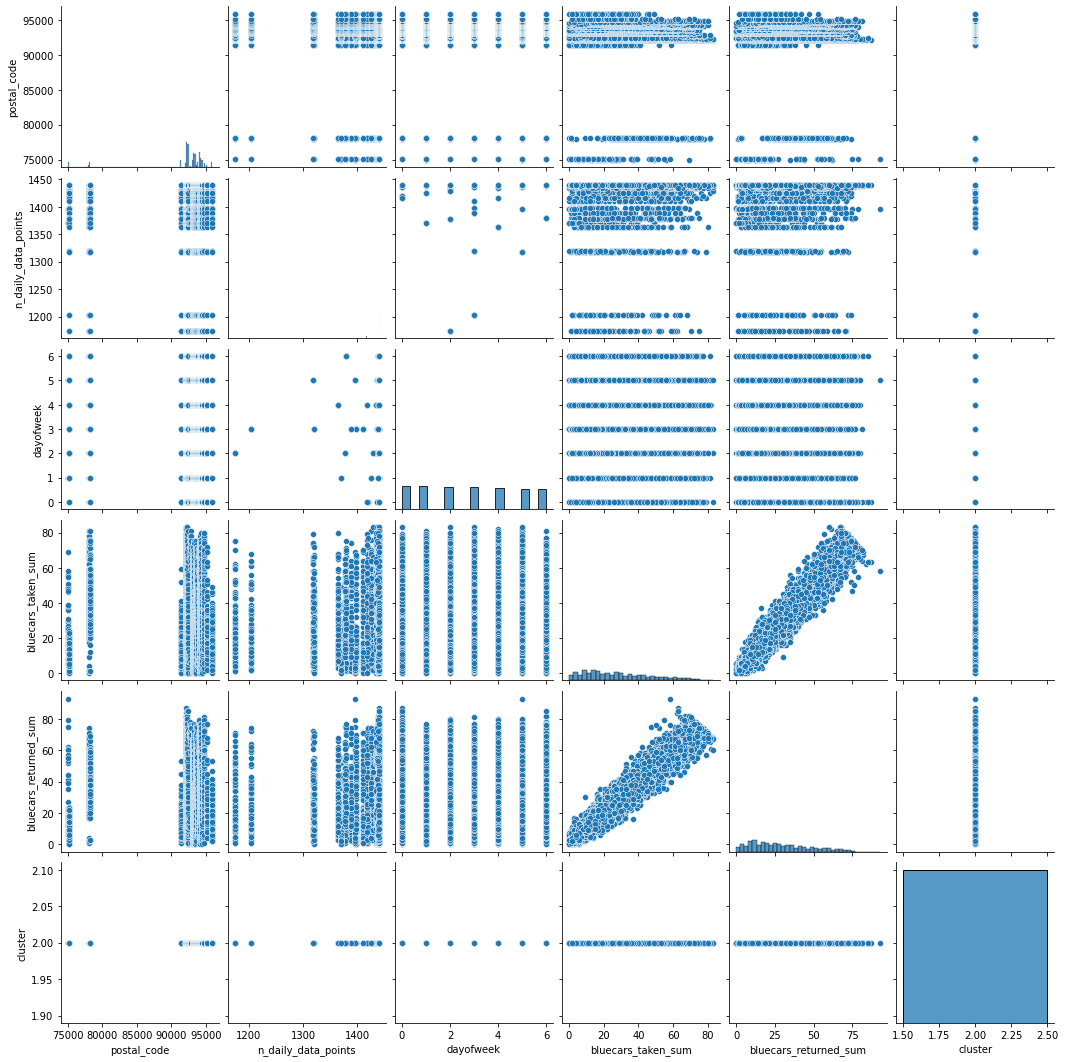

In [57]:
#the bivariate summaries 
sns.pairplot(bc_df3)
plt.show()

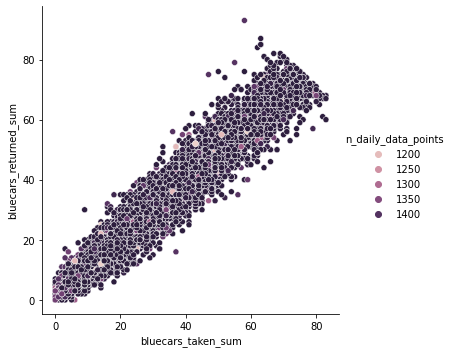

In [58]:
#the relationship between blucars taken and bluecars returned
sns.relplot( x = 'bluecars_taken_sum', y = 'bluecars_returned_sum', hue = 'n_daily_data_points',data= bc_df3)

The average daily data points lie between 1350-1400

# 8. Hypothesis Testing

In [46]:

#STATING THE HYPOTHESIS
#Ho: mu=1400
#H1: mu != 1400

#THE LEVEL OF SIGNIFICANCE
#alpha = 0.05

#THE STATISTIC TEST
zscore =( 1400- bc_df['n_daily_data_points'].mean() )/bc_df['n_daily_data_points'].std()
zscore

-0.9433509362072628

In [49]:
#getting the value
alpha = 0.05
prob = 1 - norm.cdf(zscore)
if prob > alpha:
 print('The mean daily data points is equal to 1400')
else:
 print('The mean daily data points is not equal to 1400')

The mean daily data points is equal to 1400


We fail to reject the null hypothesis and conclude that the mean daily data points is 1400